In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi

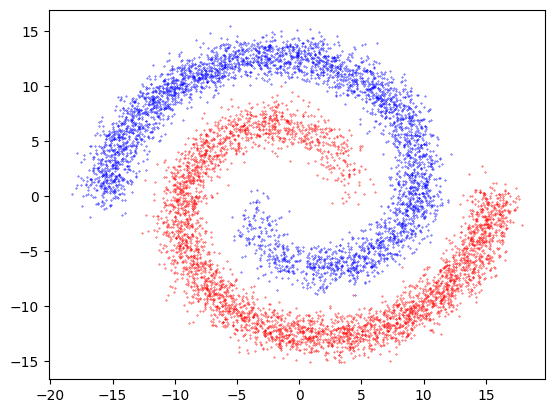

In [3]:
# import matplotlib.pyplot as plt
N = 4000
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

plt.scatter(x_a[:,0],x_a[:,1], c='red', s=0.1)
plt.scatter(x_b[:,0],x_b[:,1], c='blue', s=0.1)
plt.show()

In [4]:
res

array([[-10.09548444,  11.49166955,   1.        ],
       [-10.97758121,  10.45900698,   1.        ],
       [-14.88435217,   5.15924279,   1.        ],
       ...,
       [  6.08450751, -13.4450399 ,   0.        ],
       [  7.86057038,   5.08936649,   1.        ],
       [  3.63143594,  12.17446789,   1.        ]])

In [5]:
X = res[:,0:2]
Y = res[:,2]

Y = Y.reshape(1, 2*N)
X = X.T
X.shape

(2, 8000)

In [6]:
X_train = X[:,0:int(2*N*0.75)]
Y_train = Y[:,0:int(2*N*0.75)]

X_test = X[:,int(2*N*0.75):]
Y_test = Y[:,int(2*N*0.75):]

In [7]:
def init_params():
    W1 = np.random.rand(32, 2) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(32, 32) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    W4 = np.random.rand(32, 32) - 0.5
    b4 = np.random.rand(32, 1) - 0.5
    W5 = np.random.rand(1, 32) - 0.5
    b5 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

In [9]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = ReLU(Z4)
    Z5 = np.dot(W5, A4) + b5
    A5 = Z5
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5

In [10]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y):
    m = X.shape[1]
    dZ5 = A5 - Y
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * ReLU_deriv(Z4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * ReLU_deriv(Z3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5

In [11]:
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    W4 -= alpha * dW4
    b4 -= alpha * db4
    W5 -= alpha * dW5
    b5 -= alpha * db5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [12]:
def mse(A5, Y):
    m = Y.shape[1]
    return np.sum((A5 - Y) ** 2) / m

In [13]:
X_train = X_train / np.max(X_train)
Y_train = Y_train / np.max(Y_train)
X_test = X_test / np.max(X_test)
Y_test = Y_test / np.max(Y_test)

In [14]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = init_params()
    losses = []  # Initialize list to store loss values
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        loss = mse(A5, Y)
        if i % 100 == 0:
            print("loss: ", loss, "iteration: ", i)
        dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha)
        losses.append(loss)  # Append loss value to list
    # Plot the loss values
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(losses)), losses)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5

In [15]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5 = gradient_descent(X_train, Y_train, 0.03, 1000)


loss:  0.4270686540856315 iteration:  0
loss:  0.1305583176672322 iteration:  100


KeyboardInterrupt: 

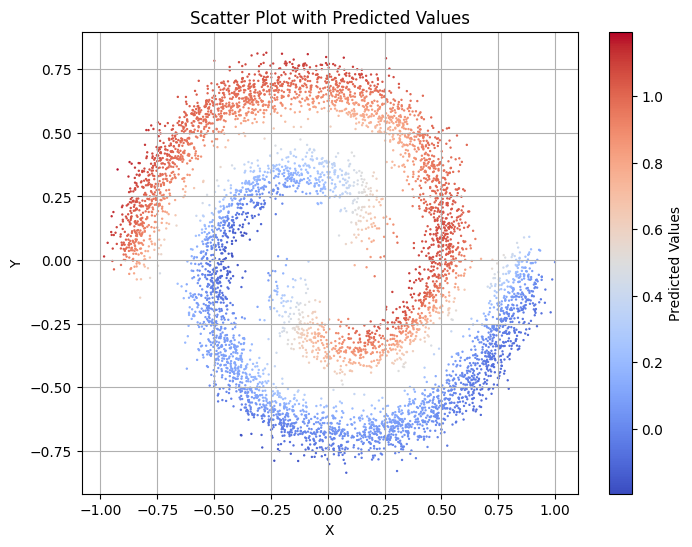

In [ ]:
Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, y_pred = forward_prop(X_train, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)

y_pred = y_pred.T
y_pred = y_pred * np.max(Y_train)
X_train = X_train * np.max(X_train)


encoded = np.where(y_pred > 0.5, 1, 0)
encoded

orange_predicted = np.where(encoded == 1)
blue_predicted = np.where(encoded == 0)

orange_real = np.where(Y_train == 1)
blue_real = np.where(Y_train == 0)



# Create scatter plot with color indicating predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_train[0, :], X_train[1, :], c=y_pred.flatten(), cmap='coolwarm', s=0.5)

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Predicted Values')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Predicted Values')

# Show plot
plt.grid(True)
plt.show()
